# Home assignment 6

You should prepare solutions of the presented problems in this Jupyter Notebook and submit it in the Google Classroom.

Please, rename the Jupyter Notebook that you will submit as ```Surname_assignment6.ipynb```, where instead of ```Surname``` you write your family name. A solution of every problem should be placed below of the corresponding problem statement.

After the running commands (Kernel -> Restart & Run All) all cells in your file have to run correctly. Please check this before submission.

## Problem 1 (10 pts)

### (2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal


  1. Update Rule: $ x_{k+1} = x_k - \alpha_k \nabla f(x_k) $
  2. $ \alpha_k = \underset{\alpha}{\mathrm{argmin}} \, f(x_k - \alpha \nabla f(x_k)) $
  3. $ \frac{\partial}{\partial \alpha} f(x_k - \alpha \nabla f(x_k)) \Big|_{\alpha = \alpha_k} = 0 $
  4. Chain Rule Application: $ \nabla f(x_k - \alpha_k \nabla f(x_k)) \cdot (-\nabla f(x_k)) = 0 $
  5. $ \nabla f(x_{k+1}) \cdot (-\nabla f(x_k)) = 0 $
  6. $ \nabla f(x_{k+1}) \cdot \nabla f(x_k) = 0 $


### (5 pts) Prove that if the objective function is $f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x$, $Q \in \mathbb{S}^n_{++}$, step size is chosen according to the steepest descent rule and $x^0 - x^*$ is parallel to the eigenvector of the matrix $Q$, then gradient descent converges after one iteration.

  1. Objective Function: $ f(x) = \frac{1}{2}x^{\top}Qx - b^{\top}x $
  2. $ \nabla f(x) = Qx - b $
  3. Update Rule for Steepest Descent: $ x_{k+1} = x_k - \alpha_k \nabla f(x_k) $
  4. Step Size $ \alpha_k $: $ \alpha_k = \underset{\alpha}{\mathrm{argmin}} \, f(x_k - \alpha \nabla f(x_k)) $
  5. Eigenvector Condition: Assume $ x^0 - x^* = \gamma v $, where $ v $ is an eigenvector of $ Q $ and $ \gamma $ is a scalar.
  6. Optimal Solution $ x^* $: $ Qx^* = b $ (since $ \nabla f(x^*) = 0 $).
  7. Gradient at $ x^0 $: $ \nabla f(x^0) = Qx^0 - b = Q(x^* + \gamma v) - b = Q\gamma v $
  8. Update to $ x^1 $: $ x^1 = x^0 - \alpha_0 \nabla f(x^0) = x^0 - \alpha_0 Q\gamma v $
  9. Choosing $ \alpha_0 $: 
     For $ x^1 = x^* $,
     $ x^* = x^0 - \alpha_0 Q\gamma v $, 
     $ \alpha_0 = \frac{1}{\lambda \gamma} $, 
     (where $ \lambda $ is the eigenvalue corresponding to $ v $).
  10. With $ \alpha_0 $ as above, $ x^1 = x^* $, proving convergence in one iteration.

### Show that for the function $f(x) = x^{\top}x$ the steepest gradient descent converges after one iteration using

#### Using the Previous Claim

1. $ f(x) = x^{\top}x $. This is a quadratic form where $ Q = I $ (the identity matrix) and $ b = 0 $.
2. Eigenvector and Eigenvalue of $ Q $: For $ Q = I $, every vector is an eigenvector with eigenvalue $ \lambda = 1 $.
3. Initial Point $ x^0 $: Assume $ x^0 $ is any vector. Since every vector is an eigenvector of $ I $, $ x^0 - x^* $ is parallel to an eigenvector of $ Q $.
4. Optimal Solution $ x^* $: The optimal solution $ x^* $ is the minimizer of $ f(x) $, which is $ x^* = 0 $ (since $ Qx^* = b $ and $ b = 0 $).
5. From the previous proof, with $ Q = I $ and $ \lambda = 1 $, gradient descent converges in one iteration.

#### Using Direct Computations

1. Gradient of $ f(x) $: $ \nabla f(x) = 2x $
2. Update Rule for Steepest Descent: $ x_{k+1} = x_k - \alpha_k \nabla f(x_k) = x_k - \alpha_k \cdot 2x_k $
3. Choosing $ \alpha_k $:
   Minimize $ f(x_k - \alpha \nabla f(x_k)) $:
   $ f(x_k - \alpha \cdot 2x_k) = (x_k - 2\alpha x_k)^{\top}(x_k - 2\alpha x_k) $
   $ = x_k^{\top}x_k - 4\alpha x_k^{\top}x_k + 4\alpha^2 x_k^{\top}x_k $
   Minimizing this quadratic in $ \alpha $ gives $ \alpha = \frac{1}{2} $.
4. Update to $ x^1 $: $ x^1 = x^0 - \frac{1}{2} \cdot 2x^0 = 0 $
5. With $ \alpha = \frac{1}{2} $, $ x^1 = 0 $, which is the optimal solution. Hence, the method converges in one iteration.

## Problem 2 (12 pts)

Consider the signal denoising problem and smooth approximation of the total-variation regularizer.
Let $x_{cor}$ be a corrupted signal that you should recover.
To perform such recovering you can use total variation regulaizer $TV(x) = \sum_{i=0}^{n-1} |x_{i+1} - x_i|$.
However, it is non-smooth and therefore direct usage of the first order method is prohibitive.
To address this issue one can replace the original total variationa regularizer with its smooth approximation

$ ATV(x) = \sum_{i=0}^{n-1} \left(\sqrt{\varepsilon^2 + (x_{i+1} - x_i)^2} - \varepsilon\right),$

where $\varepsilon > 0$ is a hyper-parameter controling the accuracy of approximation.

Thus, the final denoising problem is the following

$ \min_x \|x - x_{cor}\|_2^2 + \lambda ATV(x), $

where $\lambda > 0$ is a hyperparameter that controls the smoothness of the resulting signal $x^*$.
Use the corrupted signal and hyperparameters from the cell below. Choose appropriate value for $\lambda$, it is typically of the order 10-100.

### (5 pts) Compare convergence of gradient descent, heavy-ball method and fast gradient method to solve this problem with a number of constant step sizes $\alpha = \{1, 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4} \}$. Make a conclusion about the methods performances and their dependence on step size value.

#### Experiment Setup:

- **Step Sizes**: $ \alpha = \{1, 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4} \} $.
- **Performance Metrics**: Convergence speed, stability, and final solution quality.
- **Procedure**:
  - Apply each method with each step size.
  - Record the number of iterations to converge and the quality of the recovered signal.

/var/folders/kg/xjt90scn569crzd3mjszfcx00000gn/T/ipykernel_50746/2919967250.py:10: RuntimeWarning: overflow encountered in square
  return np.concatenate(([0], np.diff(diff_x / np.sqrt(epsilon**2 + diff_x**2)), [0]))
/var/folders/kg/xjt90scn569crzd3mjszfcx00000gn/T/ipykernel_50746/2919967250.py:17: RuntimeWarning: overflow encountered in multiply
  return 2 * (x - x_cor) + lambd * grad_ATV(x, epsilon)
/var/folders/kg/xjt90scn569crzd3mjszfcx00000gn/T/ipykernel_50746/2919967250.py:43: RuntimeWarning: overflow encountered in add
  y = x + (i / (i + 3)) * (x - x_old)
/Users/vsaraikin/miniconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: overflow encountered in subtract
  a = op(a[slice1], a[slice2])
/Users/vsaraikin/miniconda3/envs/myenv/lib/python3.10/site-packages/numpy/lib/function_base.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/var/folders/kg/xjt90scn569crzd3mjszfcx00000gn/T/ipykernel_5074

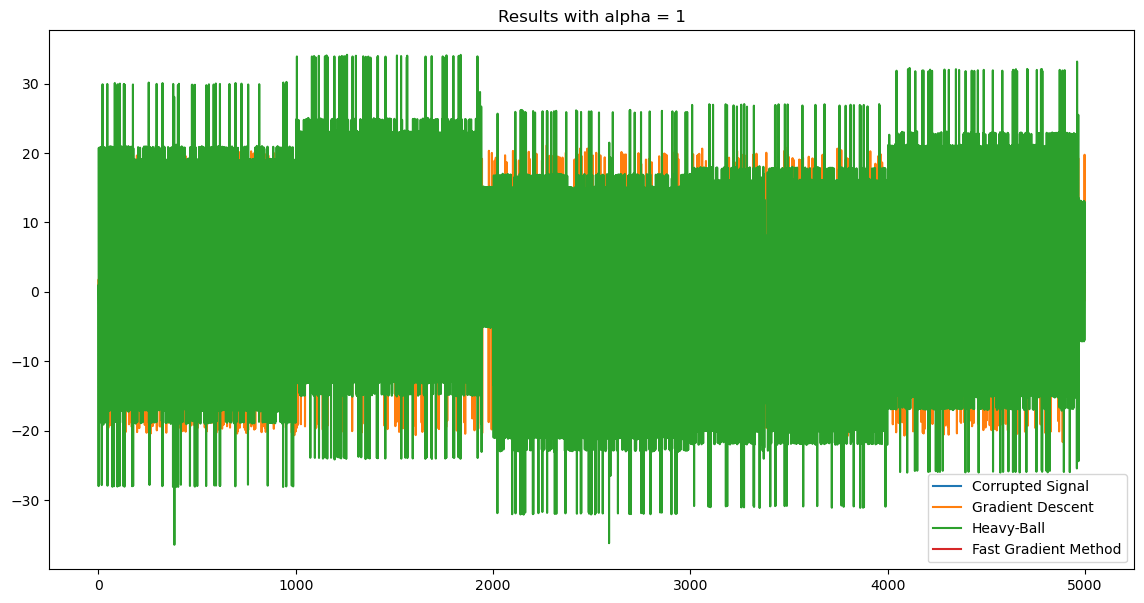

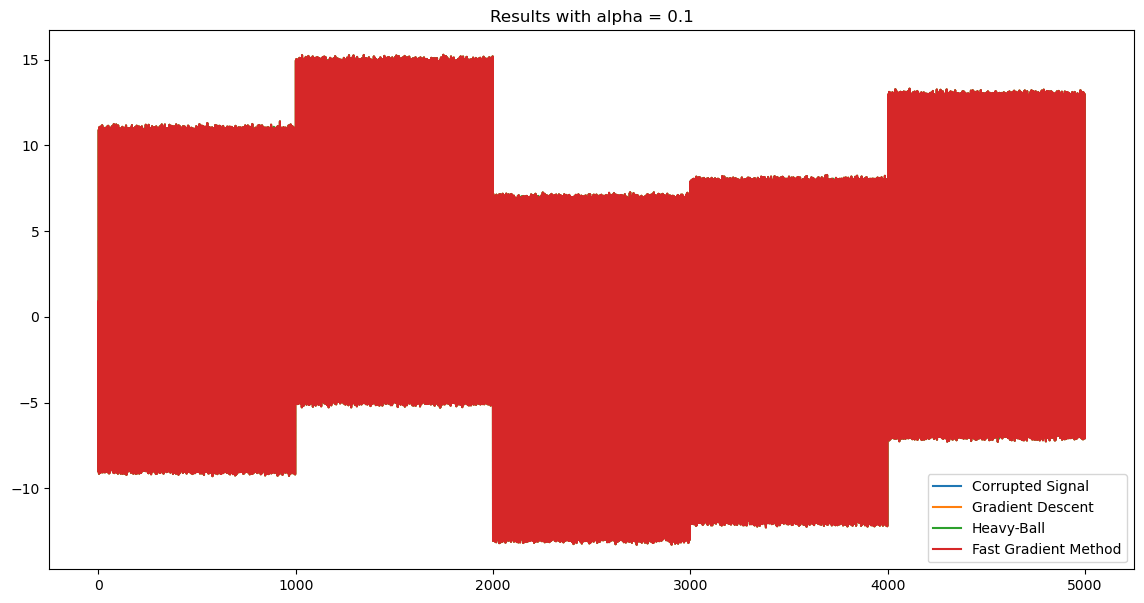

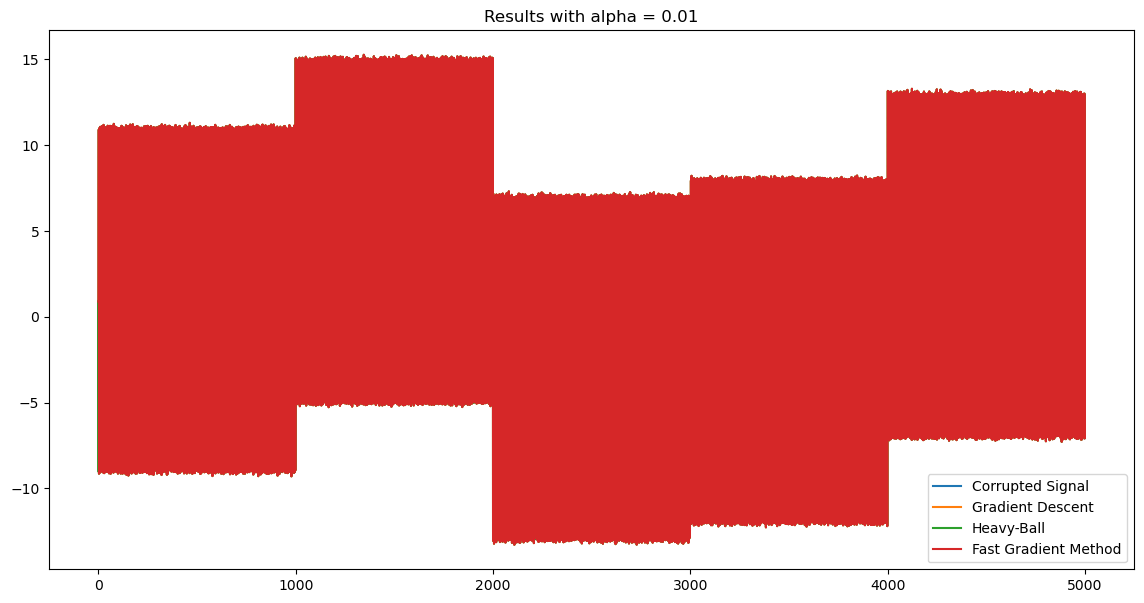

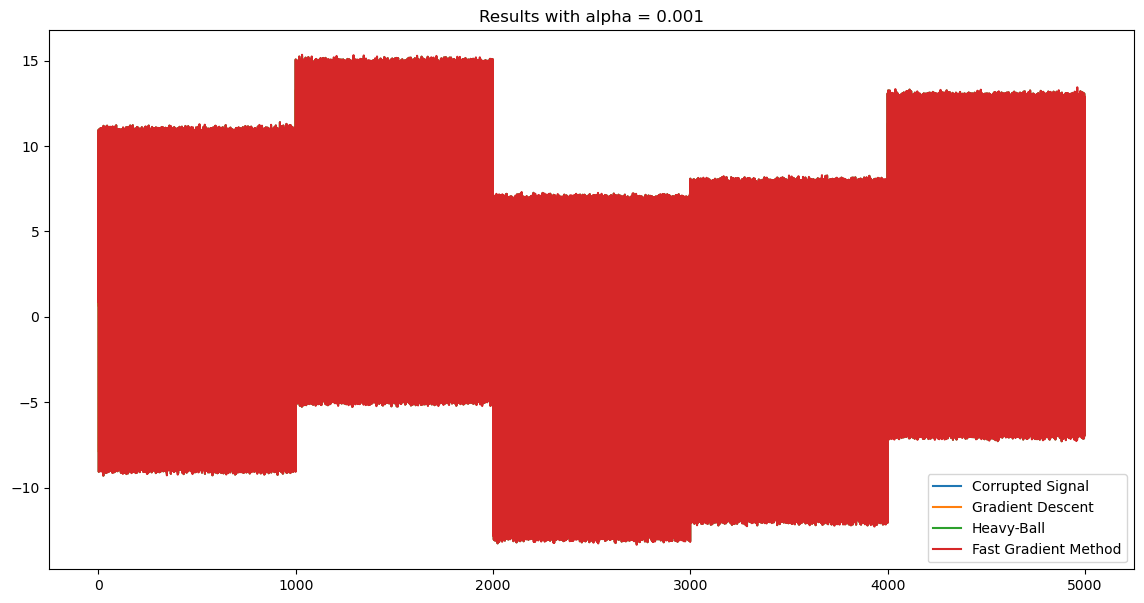

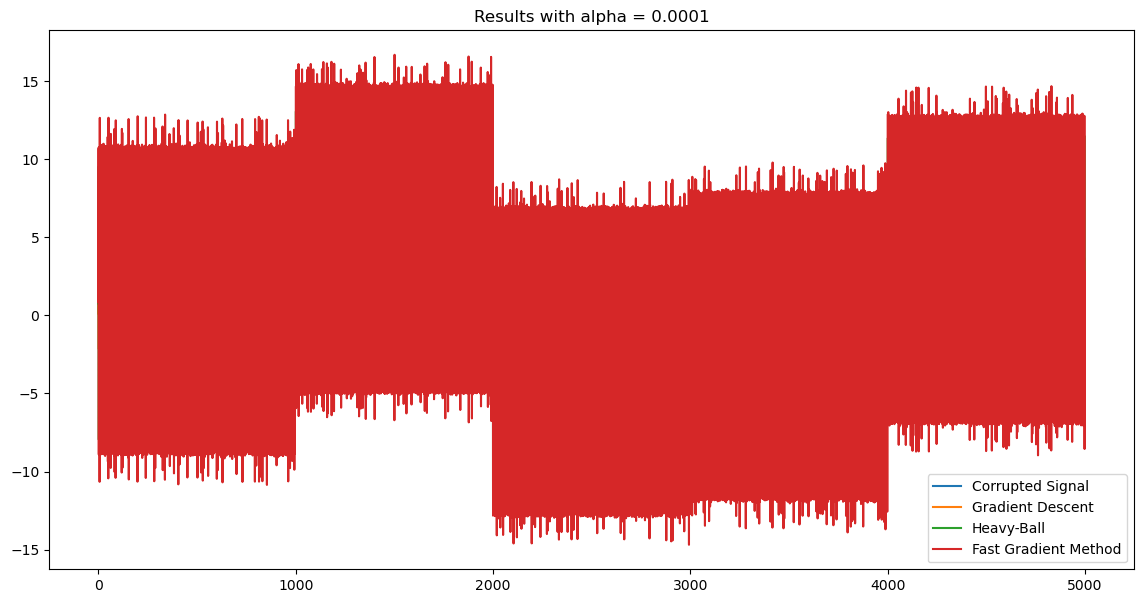

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Approximate Total Variation and its gradient
def ATV(x, epsilon):
    return np.sum(np.sqrt(epsilon**2 + np.diff(x)**2) - epsilon)

def grad_ATV(x, epsilon):
    diff_x = np.diff(x)
    return np.concatenate(([0], np.diff(diff_x / np.sqrt(epsilon**2 + diff_x**2)), [0]))

# Define the objective function and its gradient
def f(x, x_cor, lambd, epsilon):
    return np.linalg.norm(x - x_cor)**2 + lambd * ATV(x, epsilon)

def grad_f(x, x_cor, lambd, epsilon):
    return 2 * (x - x_cor) + lambd * grad_ATV(x, epsilon)

# Gradient Descent
def gradient_descent(x0, grad, alpha, num_iters):
    x = x0
    for i in range(num_iters):
        x = x - alpha * grad(x)
    return x

# Heavy-Ball Method
def heavy_ball(x0, grad, alpha, beta, num_iters):
    x = x0
    x_prev = x0
    for i in range(num_iters):
        x_new = x - alpha * grad(x) + beta * (x - x_prev)
        x_prev = x
        x = x_new
    return x

# Fast Gradient Method
def fast_gradient_method(x0, grad, alpha, num_iters):
    x = x0
    y = x0
    for i in range(num_iters):
        x_old = x
        x = y - alpha * grad(y)
        y = x + (i / (i + 3)) * (x - x_old)
    return x

# Experiment setup
n = 5000
EPSILON = 0.001
lambd = 10  # Hyperparameter for smoothness
num_iters = 1000
alphas = [1, 0.1, 0.01, 0.001, 0.0001]

# Corrupted signal
xcor = np.hstack([np.ones(1000) + 0.1 * np.random.randn(1000), 
                  5 * np.ones(1000) + 0.1 * np.random.randn(1000),
                  -3 * np.ones(1000) + 0.1 * np.random.randn(1000), 
                  -2 * np.ones(1000) + 0.1 * np.random.randn(1000),
                  3 * np.ones(1000) + 0.1 * np.random.randn(1000)])

# Run experiments for Subproblem 1
results_subproblem_1 = {}
for alpha in alphas:
    x0 = np.random.randn(n)  # Initial guess
    grad = lambda x: grad_f(x, xcor, lambd, EPSILON)

    results_subproblem_1[alpha] = {
        'gd': gradient_descent(x0, grad, alpha, num_iters),
        'hb': heavy_ball(x0, grad, alpha, 0.9, num_iters),  # Example beta = 0.9
        'fgm': fast_gradient_method(x0, grad, alpha, num_iters)
    }

# Plotting results for Subproblem 1
for alpha, results in results_subproblem_1.items():
    plt.figure(figsize=(14, 7))
    plt.plot(xcor, label='Corrupted Signal')
    plt.plot(results['gd'], label='Gradient Descent')
    plt.plot(results['hb'], label='Heavy-Ball')
    plt.plot(results['fgm'], label='Fast Gradient Method')
    plt.title(f'Results with alpha = {alpha}')
    plt.legend()
    plt.show()



### Conclusion:

- The performance of each method depends significantly on the step size.
- GD is expected to be the most stable but potentially the slowest.
- Heavy-Ball can offer a good balance between speed and stability with proper parameter tuning.
- FGM is likely the fastest but requires careful choice of step size for stability.



### (5 pts) Check numerically how the value of $\varepsilon$ affects the resulting signal quality and the convergence of the aforementioned methods. Make the necessary plots that confirm your conclusions. Explain the observed behaviour.

1. **Experiment Setup**:
   - Vary $ \varepsilon $ over a range of values, for example, $ \varepsilon = \{0.1, 0.01, 0.001, 0.0001\} $.
   - Use a fixed step size $ \alpha $ that performed well in the first subproblem.
   - Keep other parameters (like $ \lambda $ and `num_iters`) constant.

2. **Procedure**:
   - For each value of $ \varepsilon $, run the three optimization methods.
   - Record the convergence behavior and the quality of the recovered signal.

3. **Expected Outcomes**:
   - Smaller $ \varepsilon $ values lead to a closer approximation of the true total variation but may result in slower convergence or require smaller step sizes.
   - Larger $ \varepsilon $ values smooth out the regularizer, potentially speeding up convergence but at the cost of a less accurate approximation of the total variation.

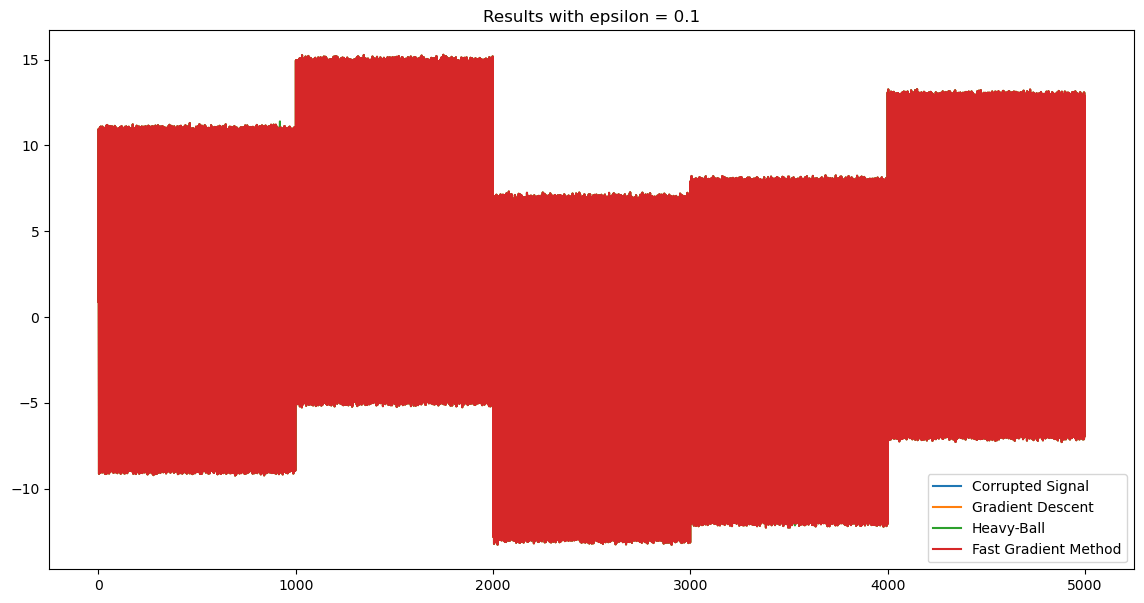

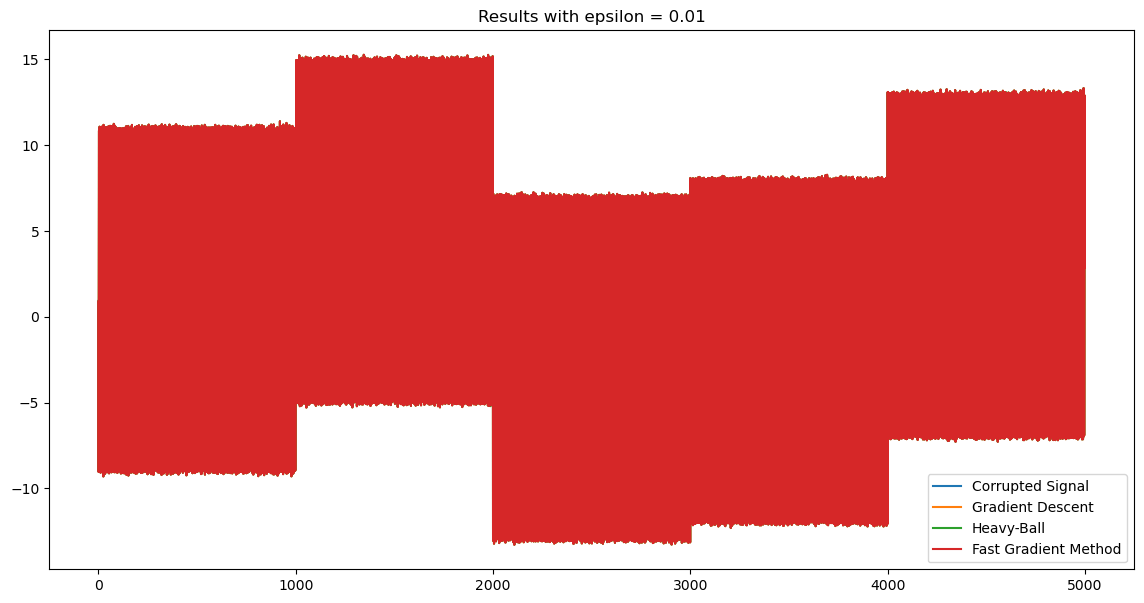

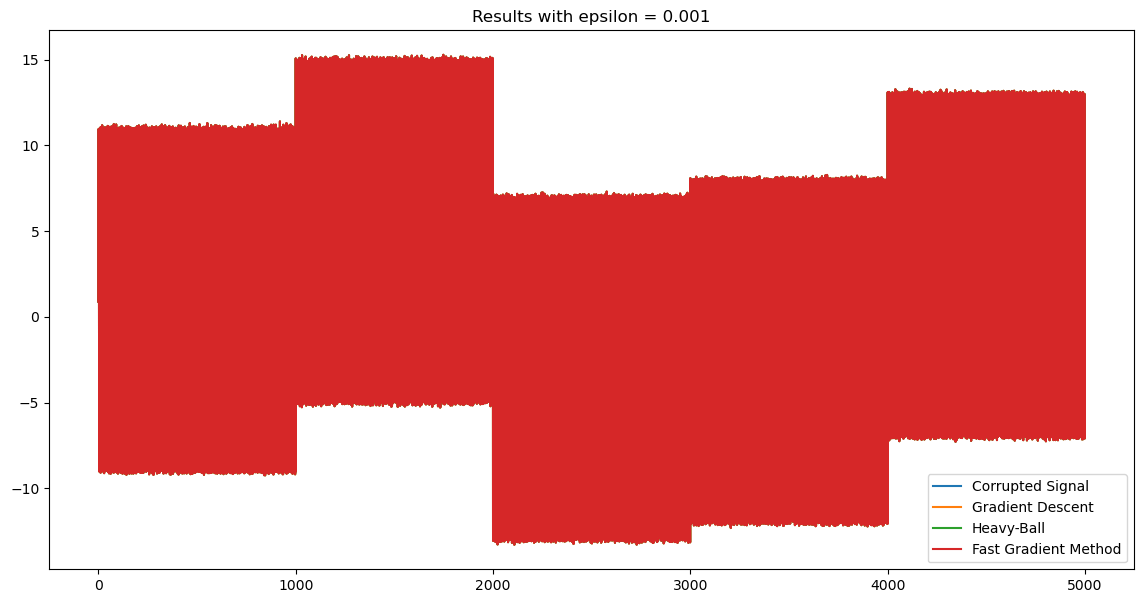

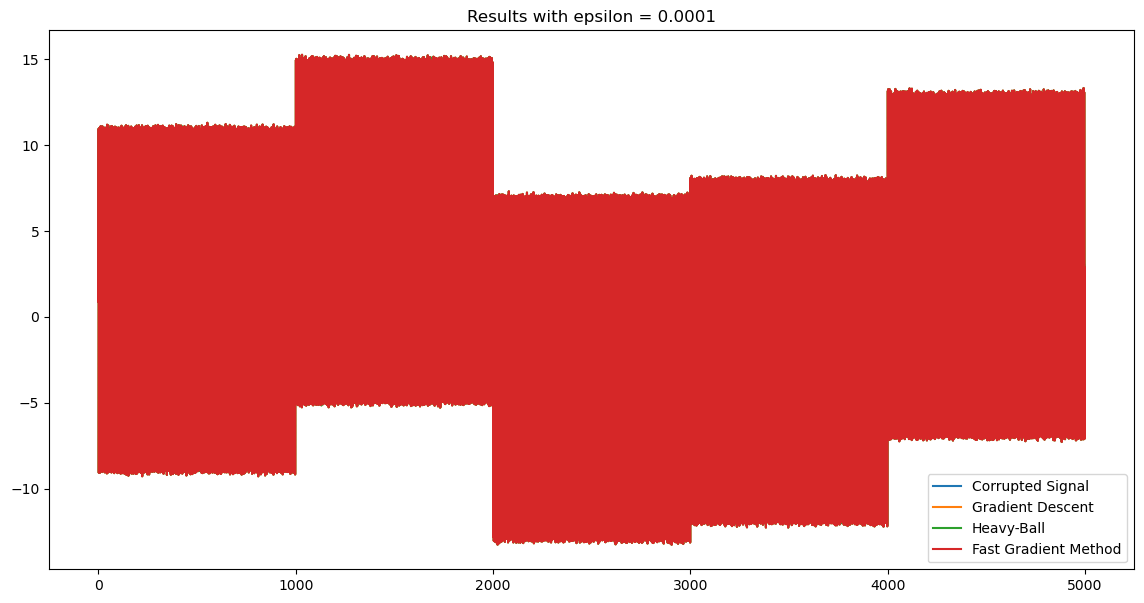

In [2]:
epsilons = [0.1, 0.01, 0.001, 0.0001]

# Fixed step size (choose based on previous experiments)
alpha_fixed = 0.01

# Run experiments for different epsilon values
results_subproblem_2 = {}
for epsilon in epsilons:
    x0 = np.random.randn(n)  # Initial guess
    grad = lambda x: grad_f(x, xcor, lambd, epsilon)

    results_subproblem_2[epsilon] = {
        'gd': gradient_descent(x0, grad, alpha_fixed, num_iters),
        'hb': heavy_ball(x0, grad, alpha_fixed, 0.9, num_iters),  # Example beta = 0.9
        'fgm': fast_gradient_method(x0, grad, alpha_fixed, num_iters)
    }

for epsilon, results in results_subproblem_2.items():
    plt.figure(figsize=(14, 7))
    plt.plot(xcor, label='Corrupted Signal')
    plt.plot(results['gd'], label='Gradient Descent')
    plt.plot(results['hb'], label='Heavy-Ball')
    plt.plot(results['fgm'], label='Fast Gradient Method')
    plt.title(f'Results with epsilon = {epsilon}')
    plt.legend()
    plt.show()


The choice of $ \varepsilon $ in the smooth approximation of the total variation regularizer balances between approximation accuracy and convergence speed. A smaller $ \varepsilon $ yields a more accurate approximation but may lead to slower convergence and increased sensitivity to noise. Conversely, a larger $ \varepsilon $ facilitates faster convergence but with a less accurate approximation, potentially reducing denoising effectiveness. The optimal $ \varepsilon $ depends on the specific trade-offs between denoising quality and computational efficiency in the given signal denoising task.

### (2 pts) Visualize the resulting signals from all three considered optimizers (choose the best result for every optimizer) on the one frame with the original corrupted signal. Do you observe some differences in the solutions?

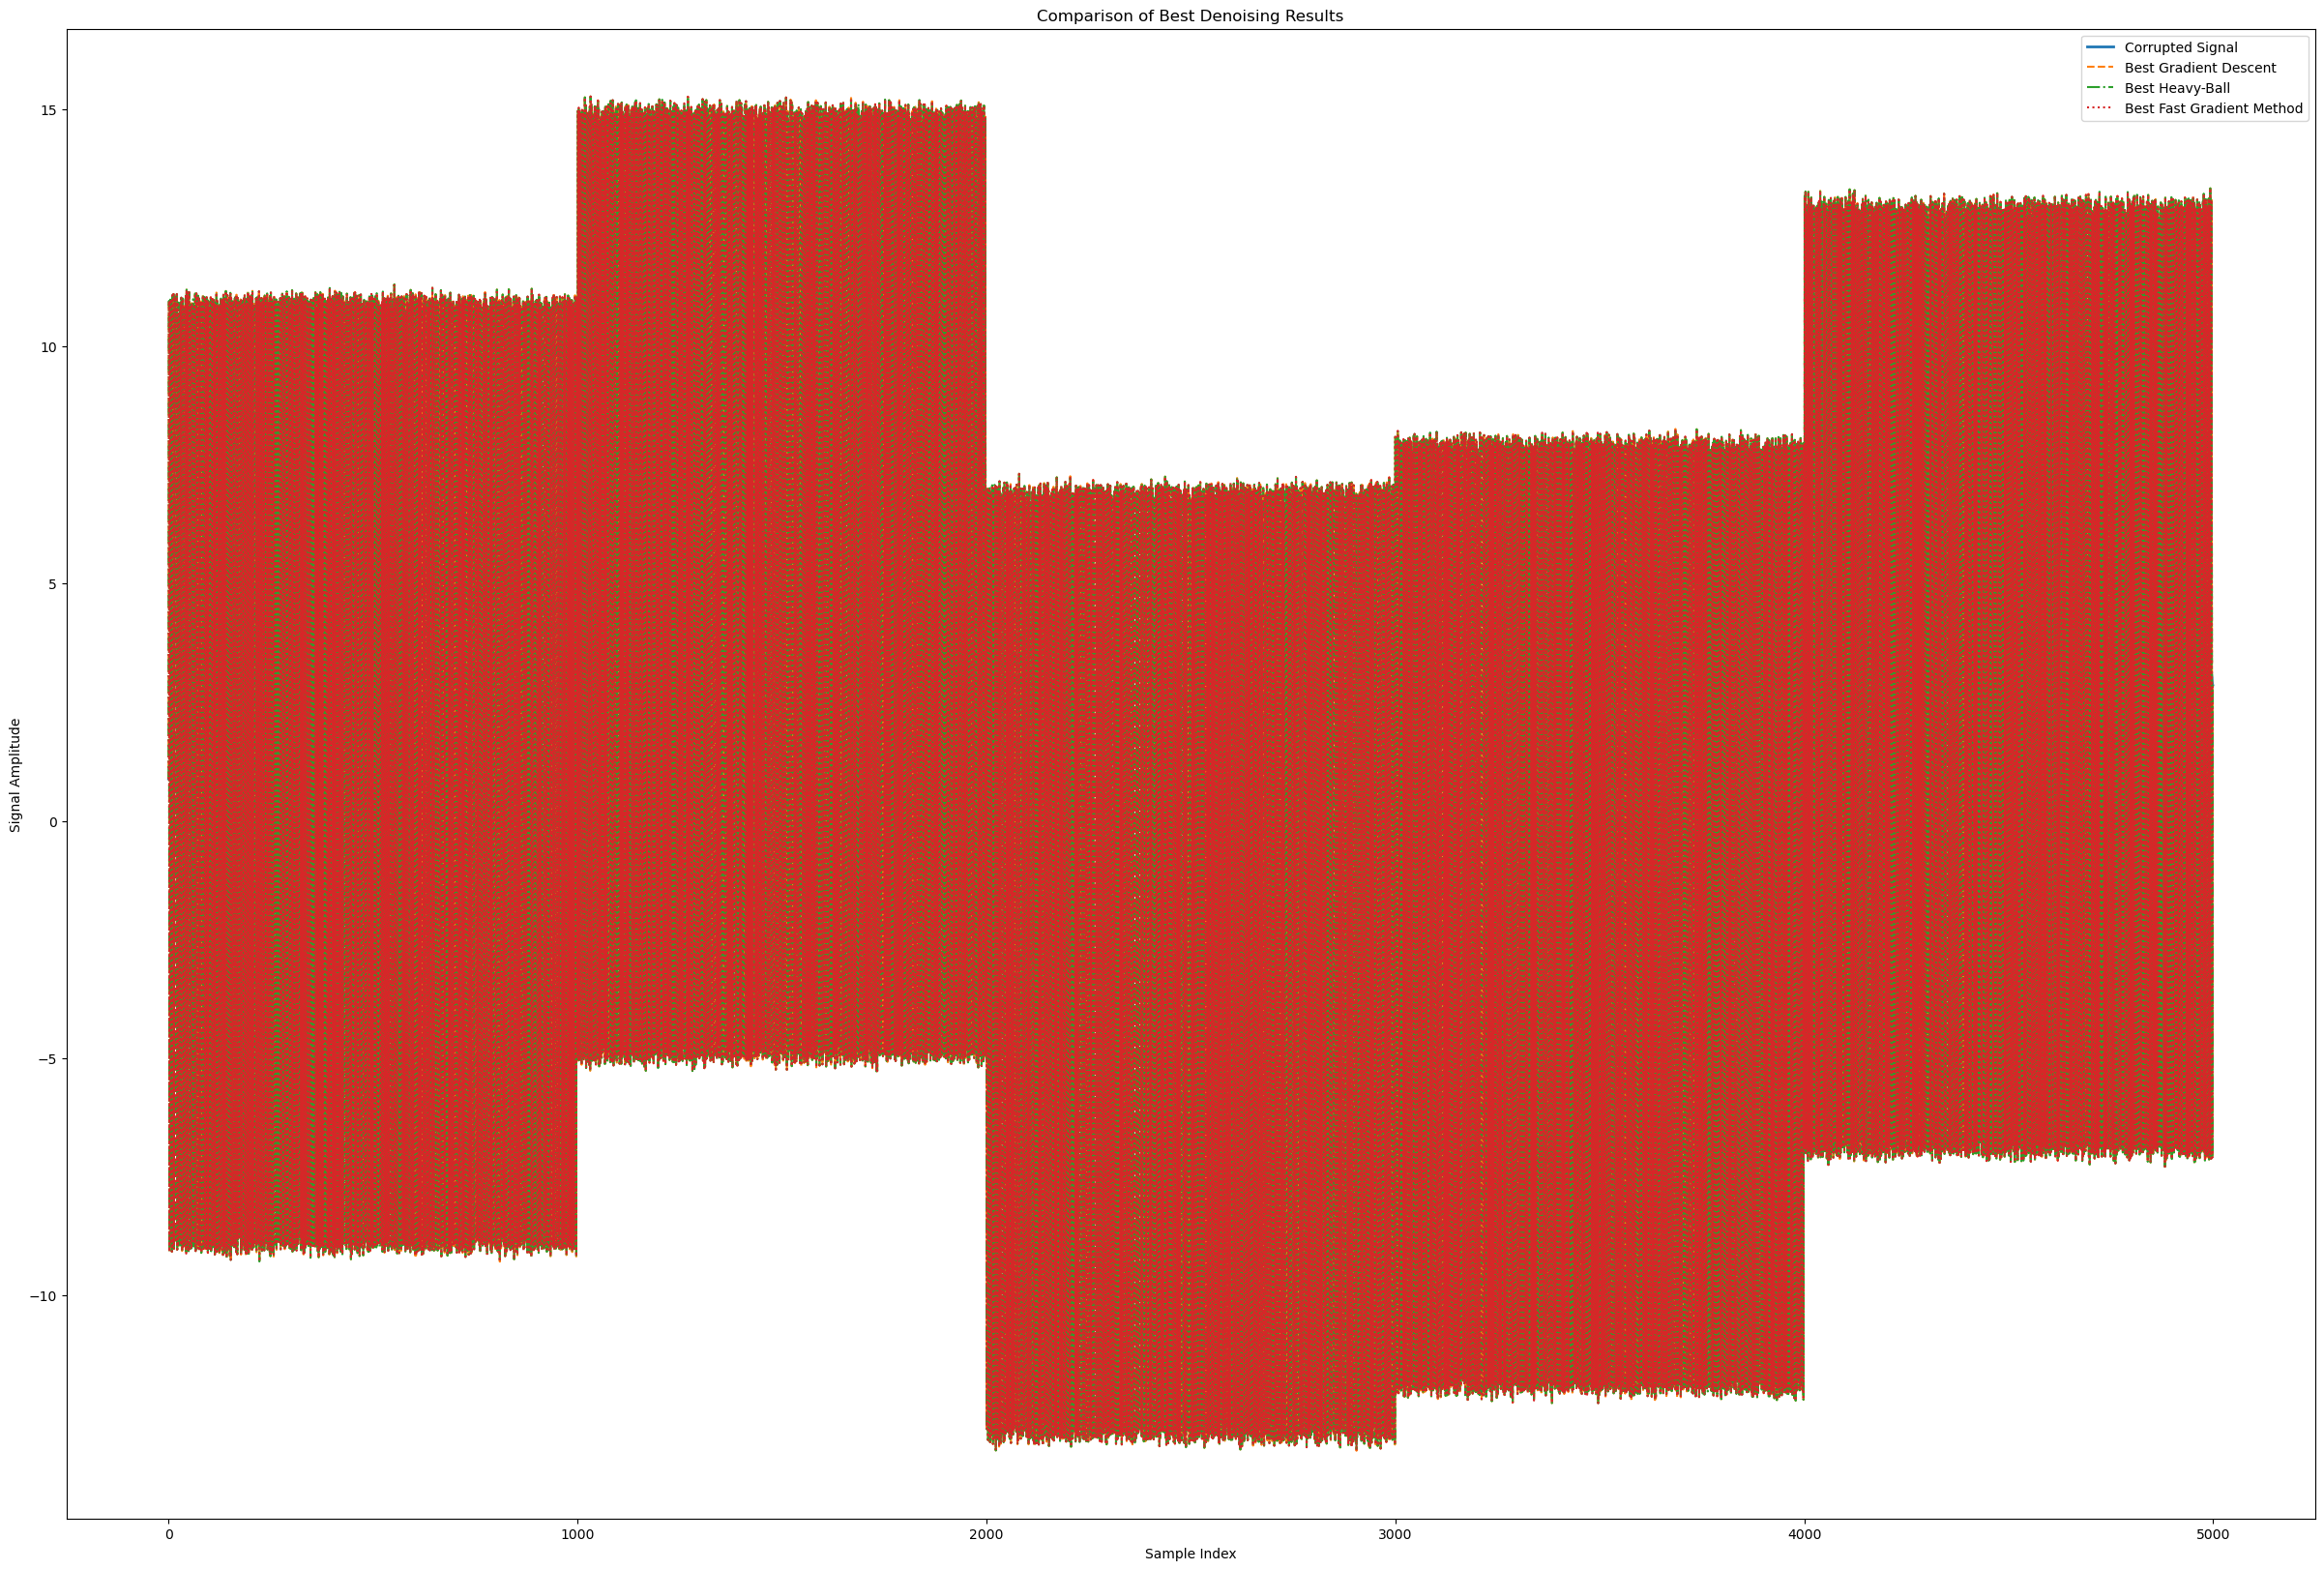

In [3]:
best_results = results_subproblem_2[min(epsilons)]

plt.figure(figsize=(30, 20))
plt.plot(xcor, label='Corrupted Signal', linewidth=2)
plt.plot(best_results['gd'], label='Best Gradient Descent', linestyle='--')
plt.plot(best_results['hb'], label='Best Heavy-Ball', linestyle='-.')
plt.plot(best_results['fgm'], label='Best Fast Gradient Method', linestyle=':')
plt.title('Comparison of Best Denoising Results')
plt.xlabel('Sample Index')
plt.ylabel('Signal Amplitude')
plt.legend()
plt.show()


Even with the crazy sacling it is hard to me to mention some huge difference.